# Set-Up

In [321]:
# import base packages into the namespace for this program
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams.update({'figure.max_open_warning': 0})

# seaborn plot settings
sns.set(style="ticks", rc={'figure.figsize':(12,8)})
sns.set_palette("Set2")

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set


# Data Preparation

In [322]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [323]:
# drop observations with missing data, if any
bank.dropna()

# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [324]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [325]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [326]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [327]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


# Data Exploration

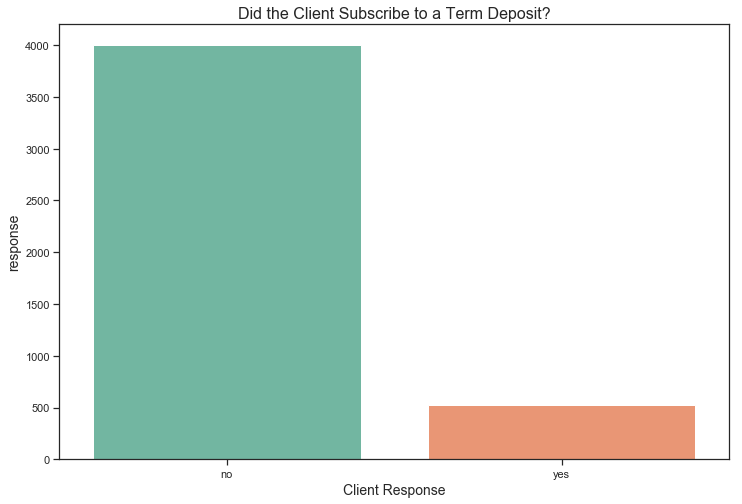

In [328]:
# see what were the responses to the term deposit subscription

plt.xlabel("Client Response", fontsize=14)
plt.ylabel("# of Clients", fontsize=14)
plt.title("Did the Client Subscribe to a Term Deposit?", fontsize=16)

sns.barplot(x=bank.response.value_counts().index, y=bank.response.value_counts())

plt.savefig('clientresponse.pdf')

In [329]:
# percentage of clients that have subscribed

percentsub = (response == 1).sum()/len(response)*100
percentsub = percentsub.round(2)
print('Percentage of clients subscribed to a term deposit ---- \n{}%'.format(percentsub))

Percentage of clients subscribed to a term deposit ---- 
11.52%


In [330]:
# see what type of clients subscribe to the term deposit

subscribed = bank[bank['response'] == 'yes']
print('Descriptive Statistics of Our Subscribed Clients ---- \n{}'.format(subscribed.describe()))

Descriptive Statistics of Our Subscribed Clients ---- 
              age       balance         day     duration    campaign  \
count  521.000000    521.000000  521.000000   521.000000  521.000000   
mean    42.491363   1571.955854   15.658349   552.742802    2.266795   
std     13.115772   2444.398956    8.235148   390.325805    2.092071   
min     19.000000  -1206.000000    1.000000    30.000000    1.000000   
25%     32.000000    171.000000    9.000000   260.000000    1.000000   
50%     40.000000    710.000000   15.000000   442.000000    2.000000   
75%     50.000000   2160.000000   22.000000   755.000000    3.000000   
max     87.000000  26965.000000   31.000000  2769.000000   24.000000   

            pdays    previous  
count  521.000000  521.000000  
mean    68.639155    1.090211  
std    121.963063    2.055368  
min     -1.000000    0.000000  
25%     -1.000000    0.000000  
50%     -1.000000    0.000000  
75%     98.000000    2.000000  
max    804.000000   14.000000  


In [331]:
# how long are clients in contact/call for for subscribed vs. didn't subscribe (seconds)

notsubscribed = bank[bank['response'] == 'no']

print('Our subscribed clients were in call for: ---- \n{} seconds'.format(subscribed.duration.mean()))

Our subscribed clients were in call for: ---- 
552.7428023032629 seconds


In [332]:
print('Our not subscribed clients were in call for: ---- \n{} seconds'.format(notsubscribed.duration.mean()))

Our not subscribed clients were in call for: ---- 
226.3475 seconds


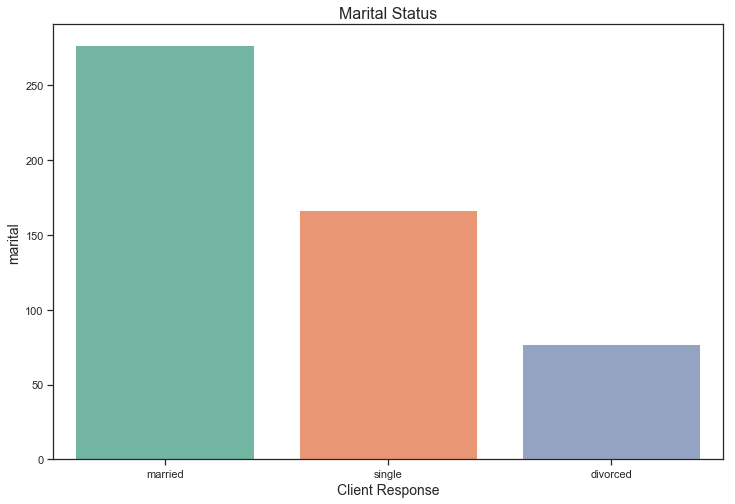

In [349]:
# are our clients married?

plt.xlabel("Client Response", fontsize=14)
plt.ylabel("# of Clients", fontsize=14)
plt.title("Marital Status", fontsize=16)

sns.barplot(x=subscribed.marital.value_counts().index, y=subscribed.marital.value_counts())

plt.savefig('marriageresponse.pdf')

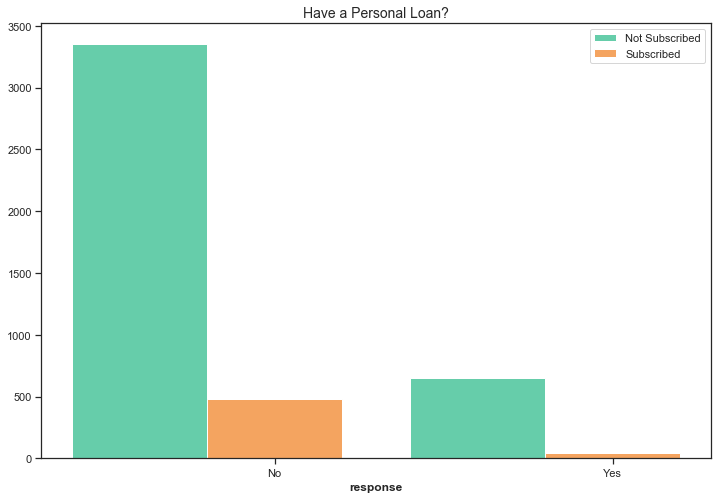

<Figure size 864x576 with 0 Axes>

In [333]:
# do our clients have personal loans?

bars2 = subscribed.loan.value_counts()
bars1 = notsubscribed.loan.value_counts()

# set sizes
barWidth = 0.4

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='mediumaquamarine', width=barWidth, edgecolor='white', label='Not Subscribed')
plt.bar(r2, bars2, color='sandybrown', width=barWidth, edgecolor='white', label='Subscribed')
 
# Add xticks on the middle of the group bars
plt.xlabel('response', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['No', 'Yes'])
 
# Create legend & Show graphic
plt.title('Have a Personal Loan?', fontsize=14)
plt.legend()
plt.show()

plt.savefig('personalloans.pdf')

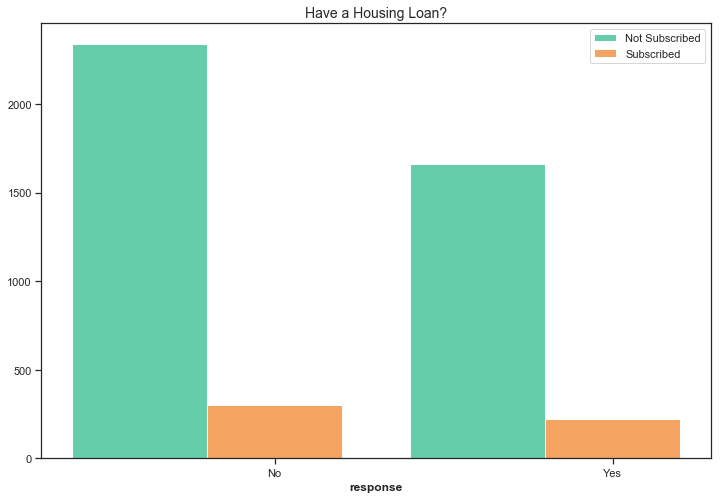

<Figure size 864x576 with 0 Axes>

In [334]:
# do our clients have a housing loan?

bars2 = subscribed.housing.value_counts()
bars1 = notsubscribed.housing.value_counts()

# set sizes
barWidth = 0.4

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='mediumaquamarine', width=barWidth, edgecolor='white', label='Not Subscribed')
plt.bar(r2, bars2, color='sandybrown', width=barWidth, edgecolor='white', label='Subscribed')
 
# Add xticks on the middle of the group bars
plt.xlabel('response', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['No', 'Yes'])
 
# Create legend & Show graphic
plt.title('Have a Housing Loan?', fontsize=14)
plt.legend()
plt.show()

plt.savefig('housingloans.pdf')

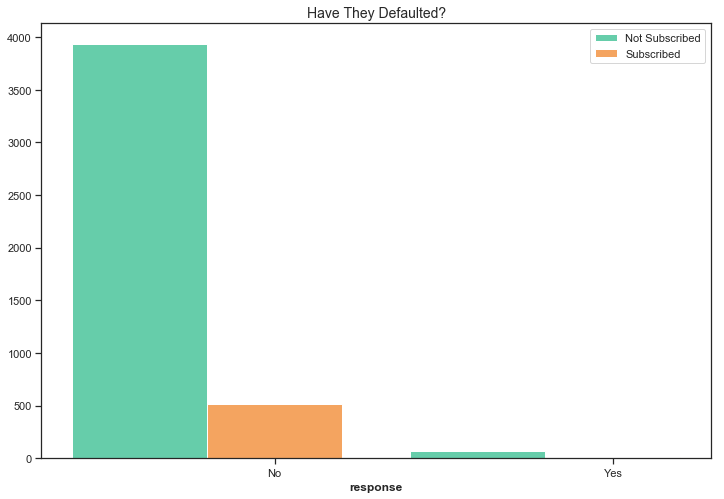

<Figure size 864x576 with 0 Axes>

In [335]:
# have they defaulted

bars2 = subscribed.default.value_counts()
bars1 = notsubscribed.default.value_counts()

# set sizes
barWidth = 0.4

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='mediumaquamarine', width=barWidth, edgecolor='white', label='Not Subscribed')
plt.bar(r2, bars2, color='sandybrown', width=barWidth, edgecolor='white', label='Subscribed')
 
# Add xticks on the middle of the group bars
plt.xlabel('response', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['No', 'Yes'])
 
# Create legend & Show graphic
plt.title('Have They Defaulted?', fontsize=14)
plt.legend()
plt.show()

plt.savefig('defaulted.pdf')

In [336]:
#see numerical value of how many of our subscribed clients have defaulted
print('Count of how many defaulted clients that subscribed ---- \n{}'.format(subscribed['default'].value_counts()))

Count of how many defaulted clients that subscribed ---- 
no     512
yes      9
Name: default, dtype: int64


In [337]:
# See the mean difference between subscribed and not subscribed customers
bank.groupby('response').mean()

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


Note: Average age, talk duration, and balance are all slightly higher for our subscribed clients

In [338]:
# education level of our clients?

print("Education Level of Our Subscribed Clients: \n{}".format(subscribed['education'].value_counts()))

percentedusub = subscribed['education'].value_counts()/subscribed['education'].count()

print("\nEducation Level of Our Subscribed Clients: \n{}".format(percentedusub.round(2)))


Education Level of Our Subscribed Clients: 
secondary    245
tertiary     193
primary       64
unknown       19
Name: education, dtype: int64

Education Level of Our Subscribed Clients: 
secondary    0.47
tertiary     0.37
primary      0.12
unknown      0.04
Name: education, dtype: float64


In [339]:
# contact method of our clients?

print("Contact Method of Our Subscribed Clients: \n{}".format(subscribed['contact'].value_counts()))

percentcontactsub = subscribed['contact'].value_counts()/subscribed['contact'].count()

print("\nContact Method of Our Subscribed Clients: \n{}".format(percentcontactsub.round(2)))


Contact Method of Our Subscribed Clients: 
cellular     416
unknown       61
telephone     44
Name: contact, dtype: int64

Contact Method of Our Subscribed Clients: 
cellular     0.80
unknown      0.12
telephone    0.08
Name: contact, dtype: float64


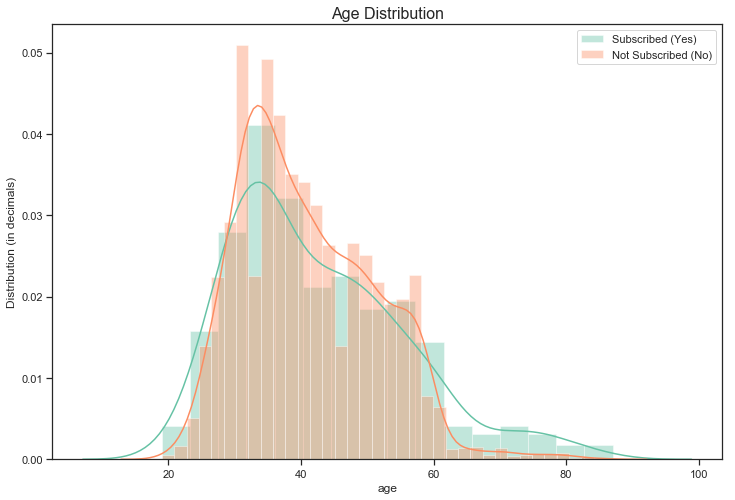

<Figure size 864x576 with 0 Axes>

In [340]:
# see the distribution of ages

sns.distplot( subscribed["age"] , label="Subscribed (Yes)")
sns.distplot( notsubscribed["age"] , label="Not Subscribed (No)")

plt.title("Age Distribution", fontsize = 16)
plt.ylabel("Distribution (in decimals)")
plt.legend()
plt.show()

plt.savefig('agehist.pdf')

Note: There is a slightly higher percentage of clients that say yes than no to subscribing

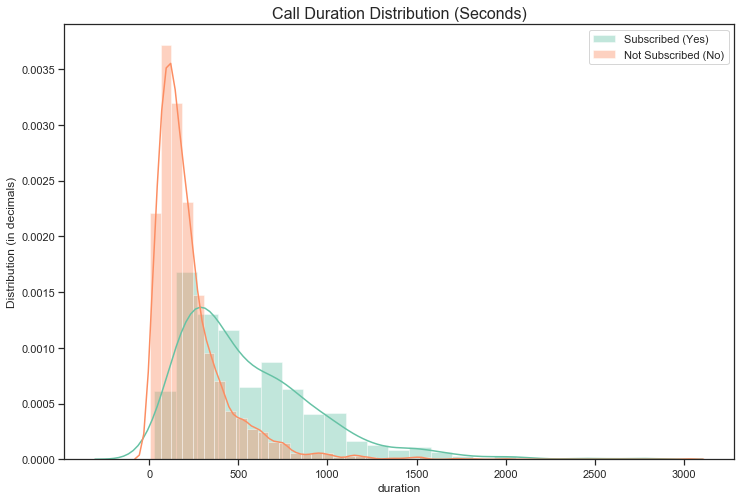

<Figure size 864x576 with 0 Axes>

In [341]:
# see the distribution of talk duration

sns.distplot( subscribed["duration"] , label="Subscribed (Yes)")
sns.distplot( notsubscribed["duration"] , label="Not Subscribed (No)")

plt.title("Call Duration Distribution (Seconds)", fontsize = 16)
plt.ylabel("Distribution (in decimals)")
plt.legend()
plt.show()

plt.savefig('callhist.pdf')

Note: Notice the longer tail in duration time for those that have subscribed

# Classification Model Comparison

<b> Logistic Regression vs. Naive Bayes </b>

<b>Model Set-Up - Defining Model Data</b>

In [342]:
# import for cross-validation scoring
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# import logistic regression and naive bayes for classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

names = ["Logistic Regression", "Naive Bayes"]
classifiers = [LogisticRegression(), 
               BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False)]


In [343]:
# setting up the model data
model_data = np.array([np.array(default), np.array(housing), 
                       np.array(loan), np.array(response)]).transpose()

# shape of the model data
print("Shape of Model Data: {}".format(model_data.shape))

Shape of Model Data: (4521, 4)


<b>K-Fold Cross Validation & Classification Model Set Up</b>


---------------- Fold Count: 0 ----------------

Shape of data for fold 0:
Data Set: (Observations, Features)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)


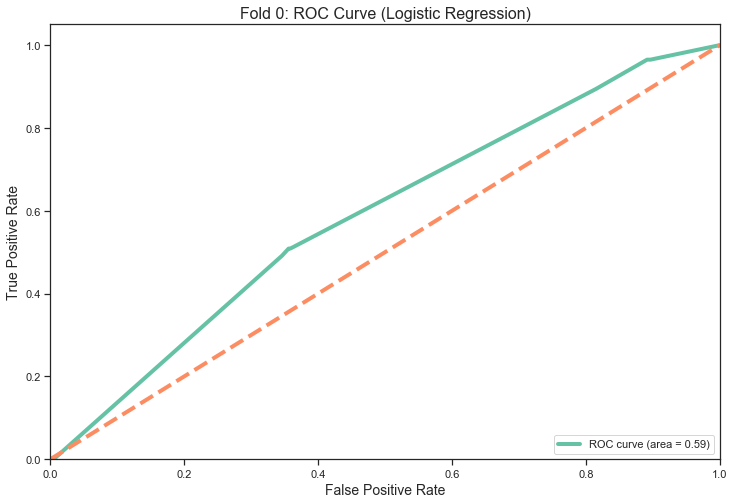

Fold Number: 0
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.59


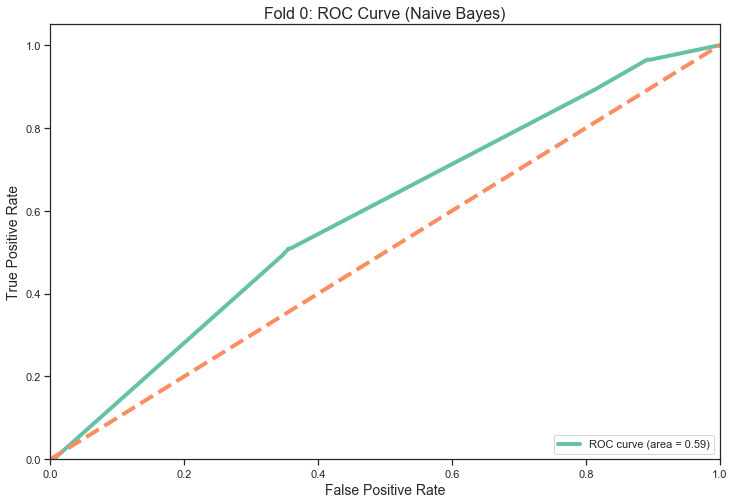

Fold Number: 0
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.59

---------------- Fold Count: 1 ----------------

Shape of data for fold 1:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


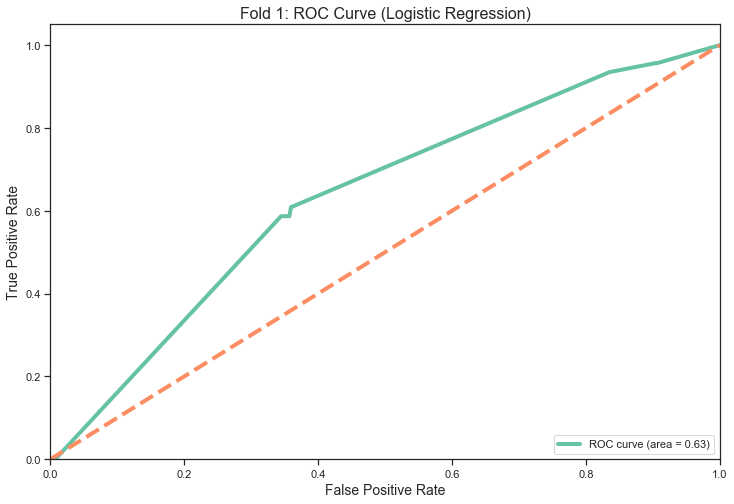

Fold Number: 1
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.63


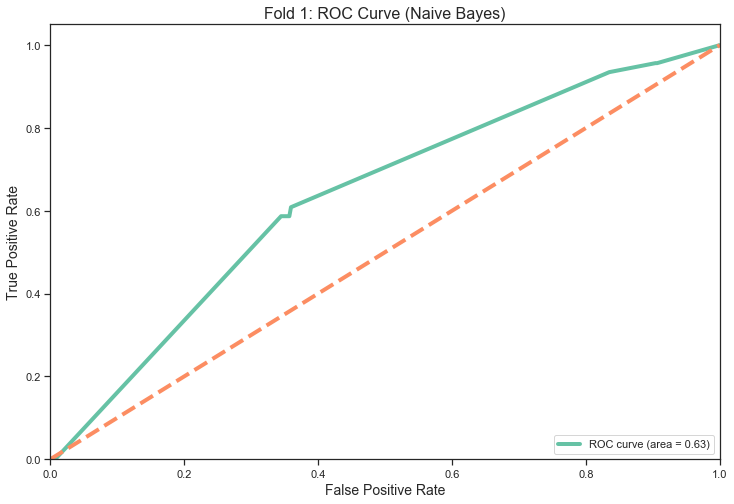

Fold Number: 1
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.63

---------------- Fold Count: 2 ----------------

Shape of data for fold 2:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


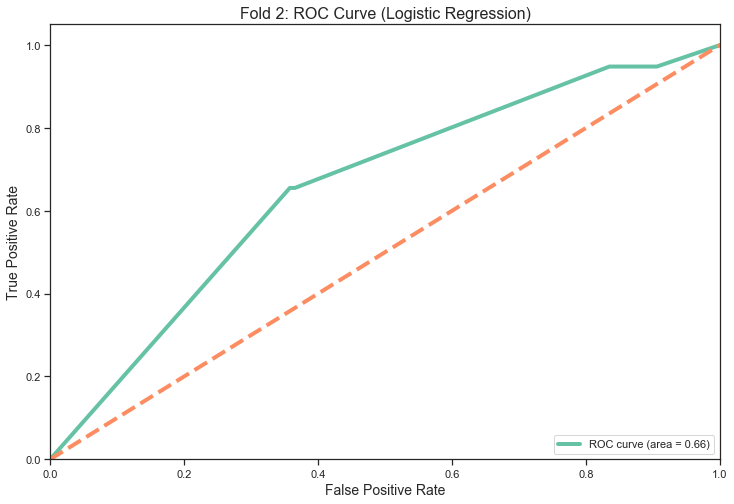

Fold Number: 2
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.66


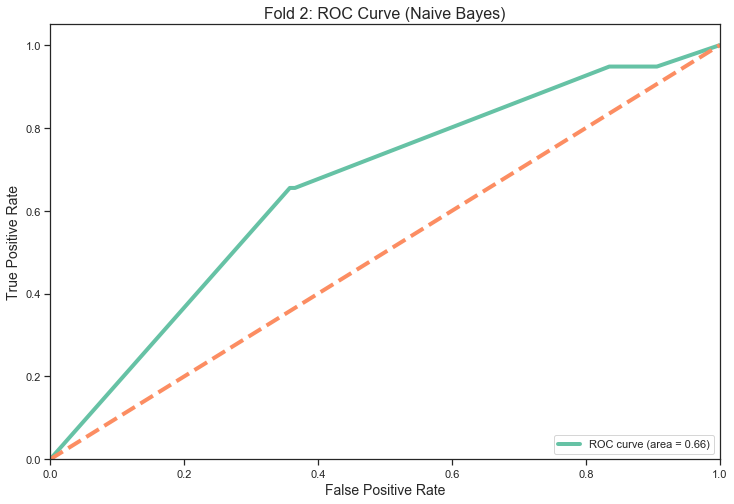

Fold Number: 2
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.66

---------------- Fold Count: 3 ----------------

Shape of data for fold 3:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


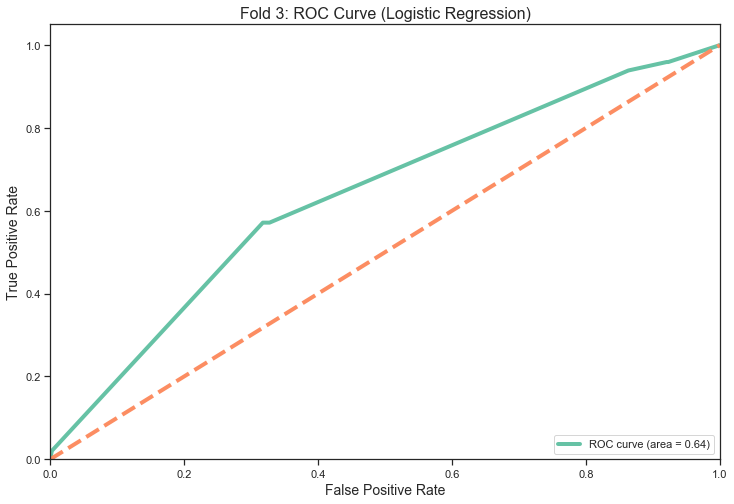

Fold Number: 3
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.64


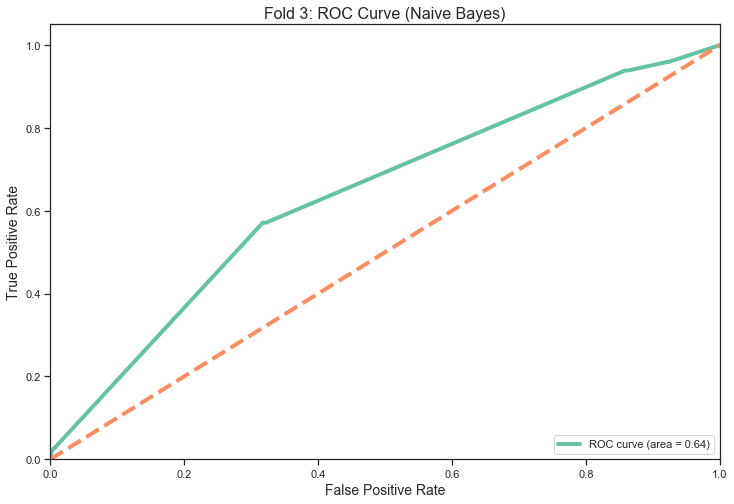

Fold Number: 3
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.64

---------------- Fold Count: 4 ----------------

Shape of data for fold 4:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


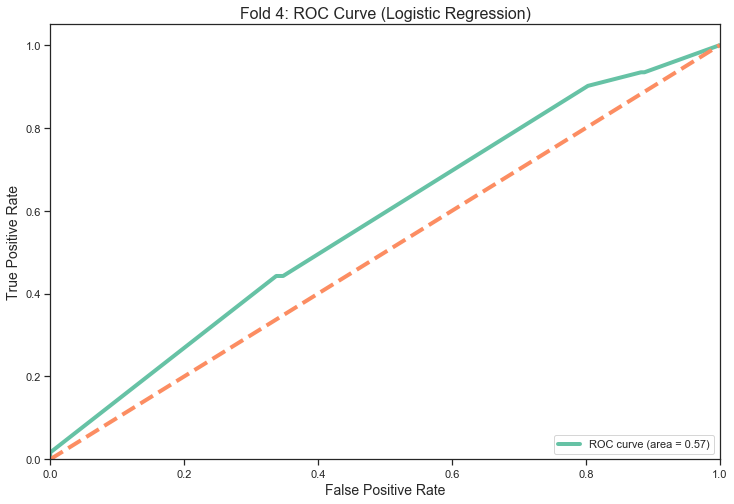

Fold Number: 4
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.57


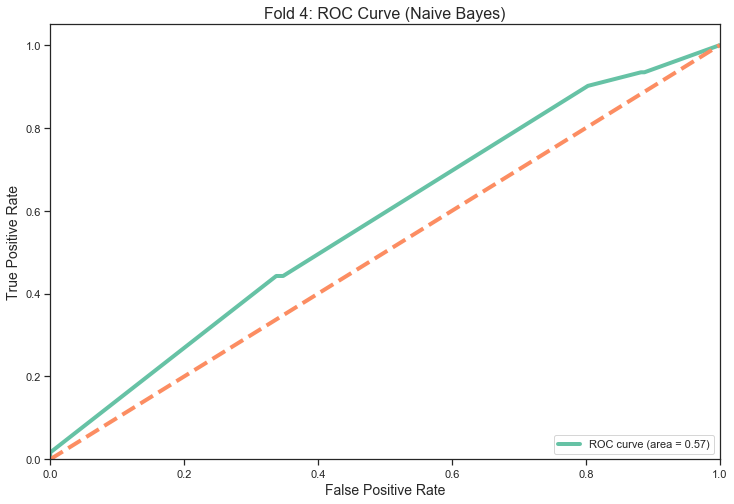

Fold Number: 4
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.57

---------------- Fold Count: 5 ----------------

Shape of data for fold 5:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


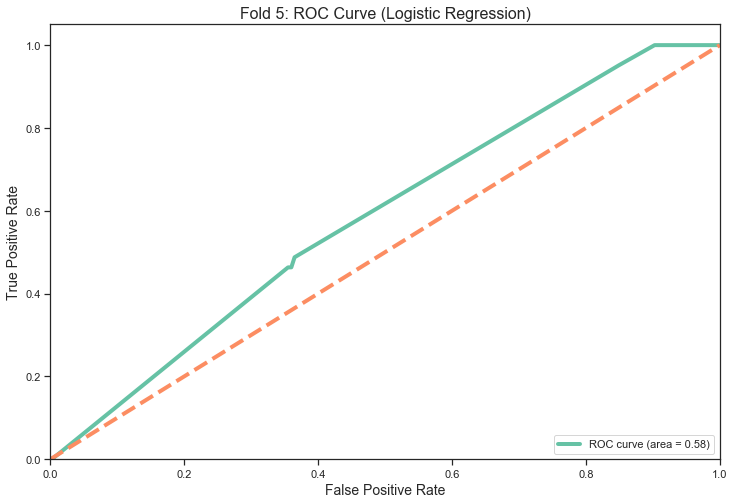

Fold Number: 5
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.58


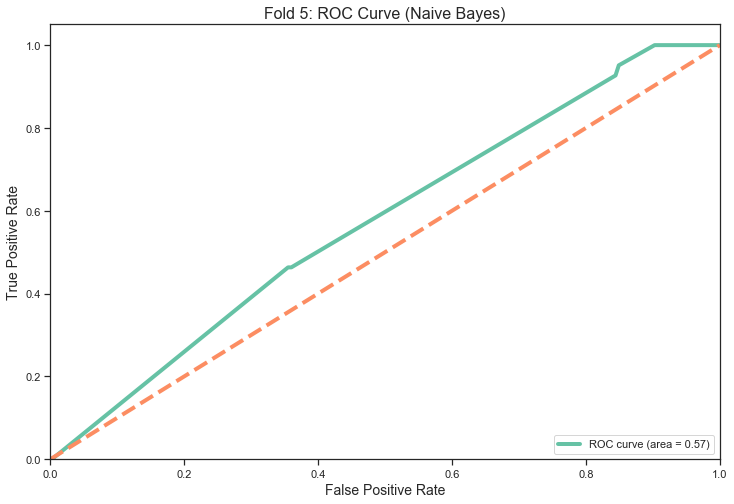

Fold Number: 5
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.57

---------------- Fold Count: 6 ----------------

Shape of data for fold 6:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


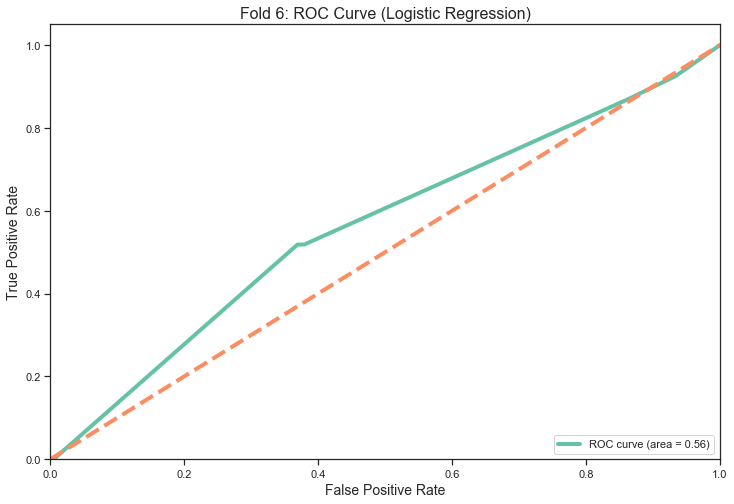

Fold Number: 6
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.56


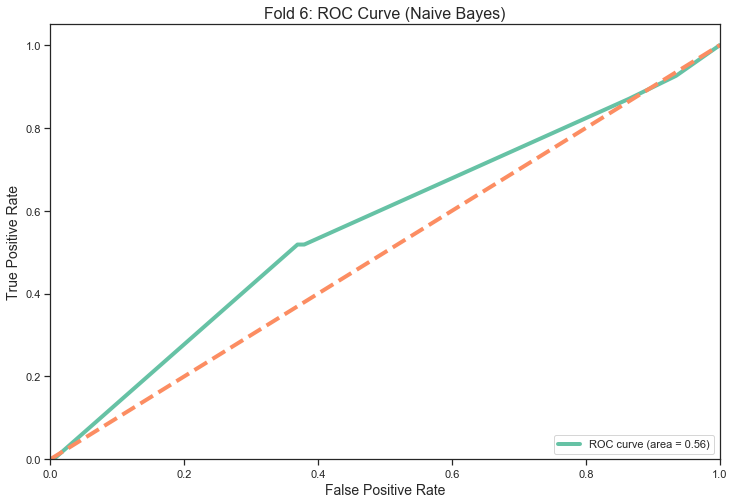

Fold Number: 6
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.56

---------------- Fold Count: 7 ----------------

Shape of data for fold 7:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


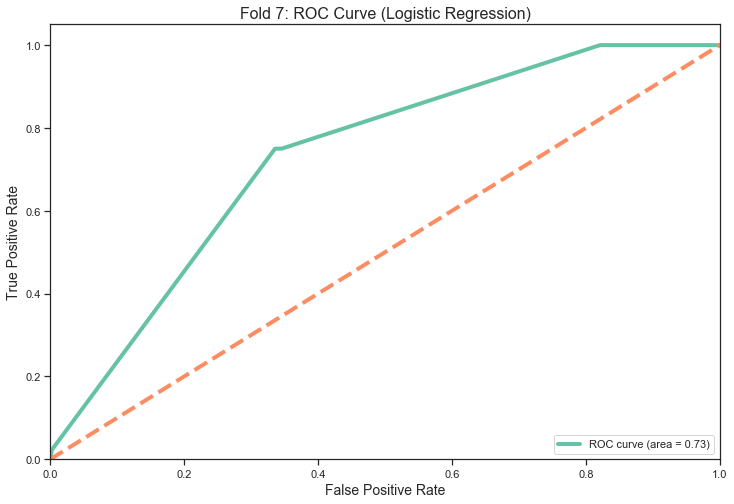

Fold Number: 7
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.73


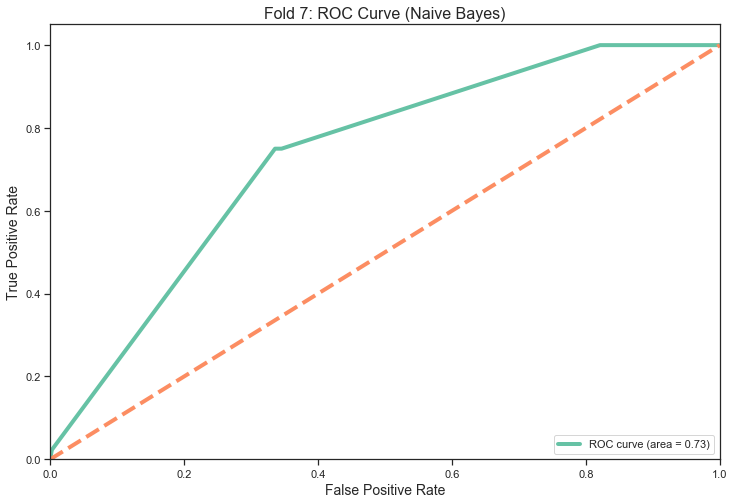

Fold Number: 7
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.73

---------------- Fold Count: 8 ----------------

Shape of data for fold 8:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


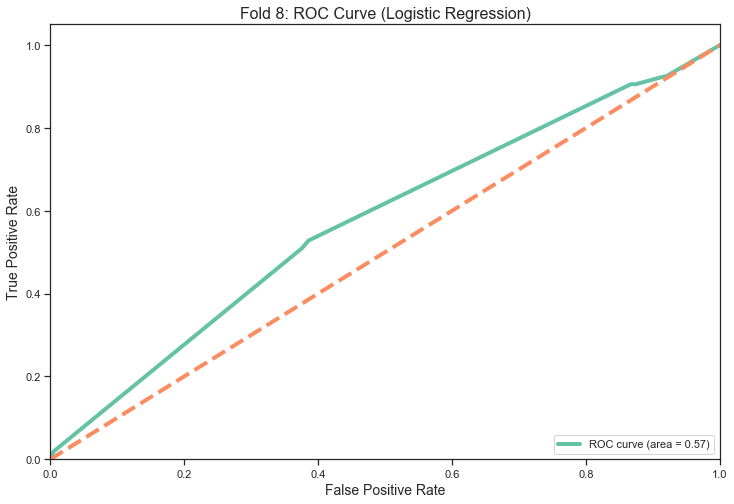

Fold Number: 8
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.57


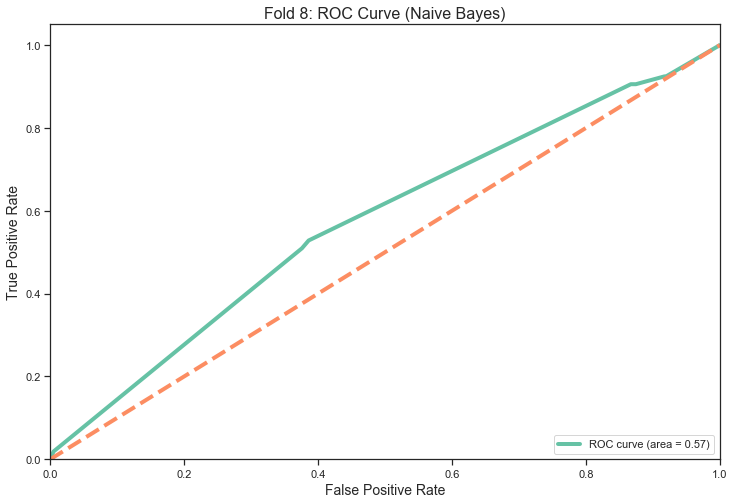

Fold Number: 8
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.57

---------------- Fold Count: 9 ----------------

Shape of data for fold 9:
Data Set: (Observations, Features)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)


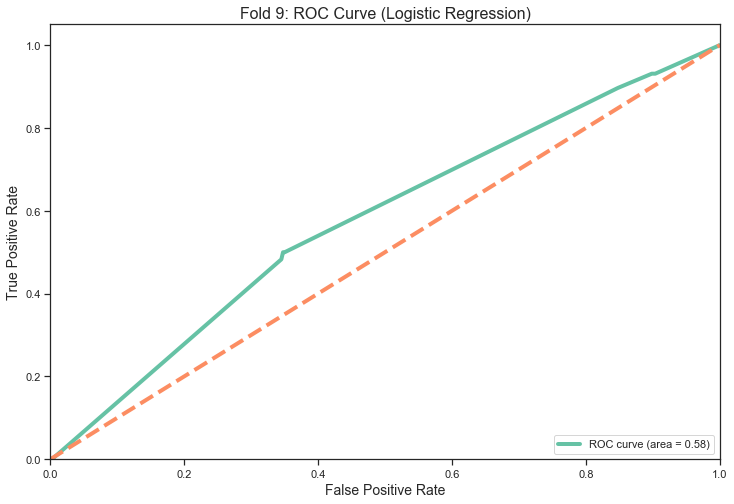

Fold Number: 9
Classification Model: Logistic Regression
Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Area Under the ROC Curve: 0.58


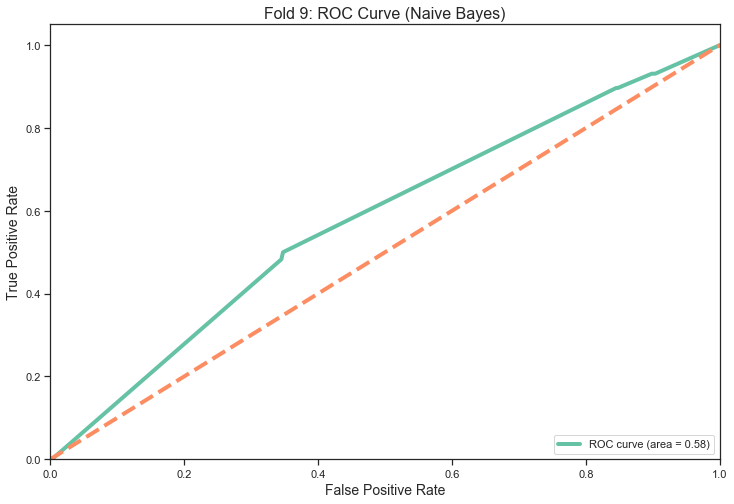

Fold Number: 9
Classification Model: Naive Bayes
Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area Under the ROC Curve: 0.58


In [344]:
from sklearn.model_selection import KFold

# define number of folds for cross validation - 10 folds
n_folds = 10

# set up numpy array for storing results
crossval_results = np.zeros((n_folds, len(classifiers)))

kf = KFold(n_splits = n_folds, shuffle=False, random_state = RANDOM_SEED)

#initialize fold count
fold_count = 0

for train_index, test_index in kf.split(model_data):
    print("\n---------------- Fold Count: {} ----------------".format(fold_count))
    # define test and train variables
    # x represents the explanatory variables
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    
    # model_data.shape[1]-1 is the response - predictive variable
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]
   
    # provides info on the data shape for each fold
    print("\nShape of data for fold {}:".format(fold_count))
    print("Data Set: (Observations, Features)")
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    classifier_count = 0
    
    for name, clf in zip(names, classifiers):
        # fit the model to the training set
        clf.fit(X_train, y_train)
        y_predict = clf.predict_proba(X_test)
        fold_result = roc_auc_score(y_test, y_predict[:,1])
        crossval_results[fold_count, classifier_count] = fold_result
        
        #visualize each ROC Curve for validation
        fpr, tpr, threshold = roc_curve(y_test, y_predict[:,1])
        roc_auc = roc_auc_score(y_test, y_predict[:,1])
        # plot the figures 
        plt.figure()
        plt.plot(fpr, tpr, lw=4, label='ROC curve (area = {})'.format(roc_auc.round(2)))
        plt.plot([0, 1], [0, 1], lw=4, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title('Fold {}: ROC Curve ({})'.format(fold_count, name), fontsize=16)
        plt.legend(loc="lower right")
        plt.savefig('Fold_{}-{}.pdf'.format(fold_count, name))
        plt.show()
        # information on the model and cross validation results
        print('Fold Number: {}'.format(fold_count))
        print('Classification Model:', name)
        print('Scikit Learn method:', clf)
        print("\nArea Under the ROC Curve: {}".format(fold_result.round(2)))
        
        classifier_count += 1
        
    fold_count += 1
    
    
    

# Final Results

In [345]:
# load cross validation data into a DataFrame
results = pd.DataFrame(crossval_results)
results.columns = names

# print average results for both classification model
print("Average Results from {}-fold cross-validation:".format(str(n_folds)))
results.mean()


Average Results from 10-fold cross-validation:


Logistic Regression    0.611733
Naive Bayes            0.611060
dtype: float64